# Basic EDA Visualizations
## Scatterplots and line graphs

### Load and Manipulate Data - As from Clustering Files

In [6]:
#Packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from sklearn import preprocessing

In [7]:
#Load the census data
census_dat = pd.read_csv('../data/Census_Data_Cleaned.csv', dtype = 'str')

#Load the hospital beds data
beds_dat = pd.read_csv('../data/hospital_beds_data.csv', dtype = 'str')

#Load the cases data - on April 9th
cases_nyc = pd.read_csv('../zcta-history/2020-04-09.csv', dtype = 'str')

In [8]:
#Join all the values together
data = cases_nyc.merge(census_dat, how = 'left', left_on = 'MODZCTA', right_on = 'zip_code_tabulation_area')
data = data.merge(beds_dat, how = 'left', left_on = 'MODZCTA', right_on = 'zip')

data["beds"] = data["beds"].fillna(0)

In [9]:
#Remove the first record (no zip)
data = data[1:]

#Remove the zip code columns
data = data.loc[:, data.columns != 'zip_code_tabulation_area']
data = data.loc[:, data.columns != 'zip']

In [10]:
#Cast the rest of the columns as float
for col in data.columns:
    if col == "MODZCTA":
        continue 
    else:
        data.loc[:,col] = data.loc[:,col].astype(float)

In [11]:
data.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos,median_house_income,housing_units,pop_total,med_age,pop_perc_white,pop_perc_black,...,perc_transportation_warehousing,perc_utilites,perc_information,perc_finance,perc_scientific,perc_education_healthcare,perc_arts_entertainment,perc_otherservices,perc_publicadministration,beds
1,99999,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,10001,191.0,408.0,46.81,86801.0,13305.0,23537.0,35.6,0.602456,0.121893,...,0.060729,0.005398,0.018893,0.020243,0.037787,0.191633,0.017544,0.018893,0.045884,0.0
3,10002,456.0,889.0,51.29,33726.0,35691.0,80736.0,40.8,0.295605,0.086108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.0
4,10003,253.0,597.0,42.38,98151.0,31575.0,57112.0,32.1,0.776352,0.043599,...,0.050100,0.008016,0.022044,0.040080,0.088176,0.126253,0.036072,0.026052,0.052104,501.0
5,10004,21.0,48.0,43.75,119691.0,2082.0,3221.0,33.1,0.705992,0.007141,...,0.000000,0.000000,0.000000,0.000000,0.312500,0.000000,0.000000,0.000000,0.000000,0.0


### Plots of all census factors against Positive tests per 10k people

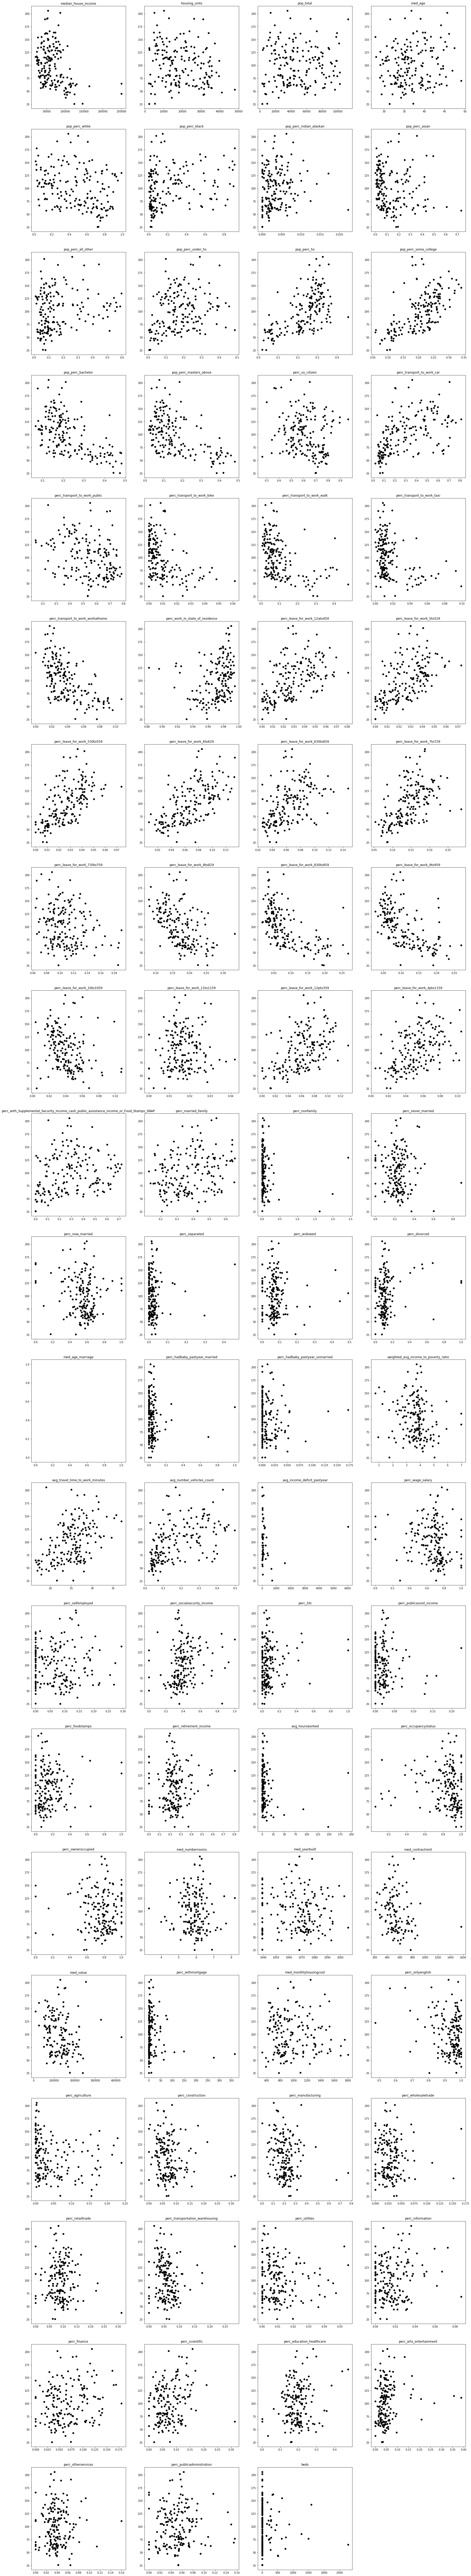

In [12]:
plt.figure(figsize = (30,50))

test_per_10k = data.Positive/(data.pop_total/10000)


count = 0
for i in range(4, 87):
    plt.subplot(22,4,i-3)
    col = str(data.columns[i])
    plt.plot(data[col], test_per_10k, 'o', color='black')
    plt.title(col)
    


plt.subplots_adjust(top=3.0)
plt.show();

### Plot with Median Household Income - log scale for outliers

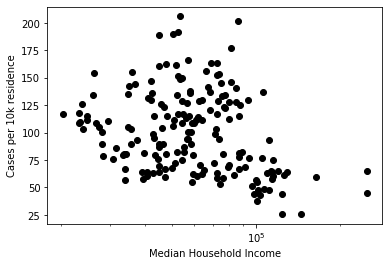

In [13]:
plt.plot(data.median_house_income,(data.Positive/(data.pop_total/10000)), 'o', color='black')
plt.xlabel("Median Household Income")
plt.ylabel("Cases per 10k residence")
plt.semilogx();

### Same plots, but using Total Tests instead of Positive Tests

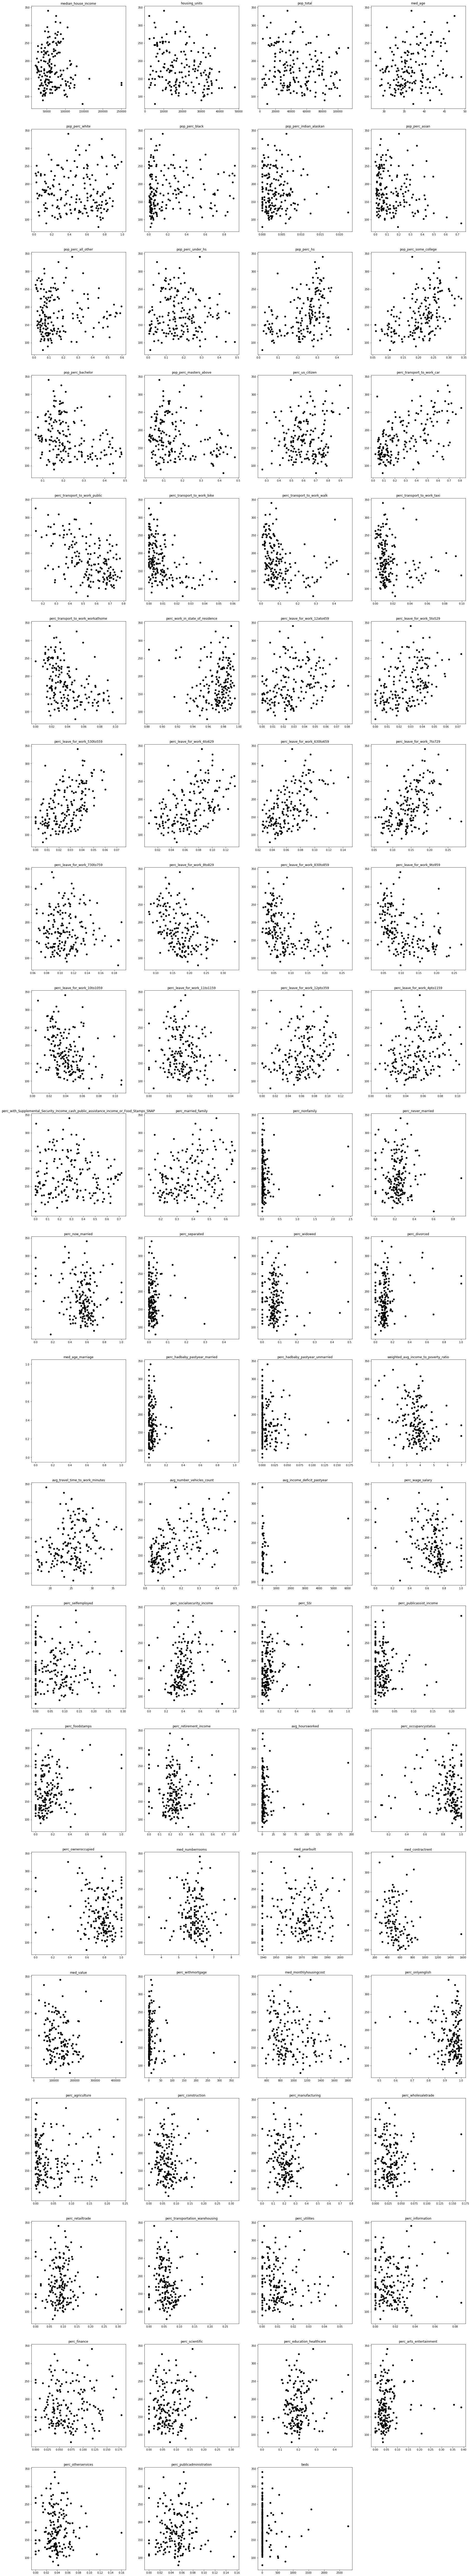

In [14]:
plt.figure(figsize = (30,50))

total_per_10k = data.Total/(data.pop_total/10000)


count = 0
for i in range(4, 87):
    plt.subplot(22,4,i-3)
    col = str(data.columns[i])
    plt.plot(data[col], total_per_10k, 'o', color='black')
    plt.title(col)
    


plt.subplots_adjust(top=3.0)
plt.show();

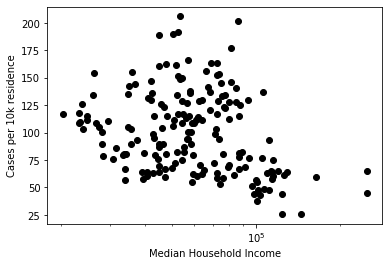

In [15]:
plt.plot(data.median_house_income,(data.Positive/(data.pop_total/10000)), 'o', color='black')
plt.xlabel("Median Household Income")
plt.ylabel("Cases per 10k residence")
plt.semilogx();

Note: The relationships with education especially are CRAZY! There is also a clear correlation with race (white and black specifically, also correlated to income/education). 

# Line Graphs

In [16]:
#Get all individual date files and concat
path = "../zcta-history/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',', dtype = 'str')
    #add a column with the date
    df['Date'] = str(f)[21:26]
    all_df.append(df)
    
all_dates=pd.concat(all_df, sort=True)

#Remove records with no zip
all_dates = all_dates.dropna(subset=['MODZCTA'])

In [17]:
#merge with census data
all_merged = all_dates.merge(census_dat, how = 'left', left_on = 'MODZCTA', right_on = 'zip_code_tabulation_area')

In [18]:
#Remove the zip code column
all_merged = all_merged.loc[:, all_merged.columns != 'zip_code_tabulation_area']

In [19]:
#Cast the rest of the columns as float (Not zip or Date)
for col in all_merged.columns:
    if col == "MODZCTA" or col == "Date":
        continue 
    else:
        all_merged.loc[:,col] = all_merged.loc[:,col].astype(float)

In [20]:
#Make a positive tests per 10k people column based on zip code population
all_merged['test_per_10k'] = all_merged.Positive/(all_merged.pop_total/10000)

In [21]:
#Averages for every day
daily_sum = all_merged.groupby("Date", as_index = False).sum()

In [22]:
#Know what each unique date is
date_list = daily_sum["Date"].tolist()
#and make sure its sorted
date_list.sort()

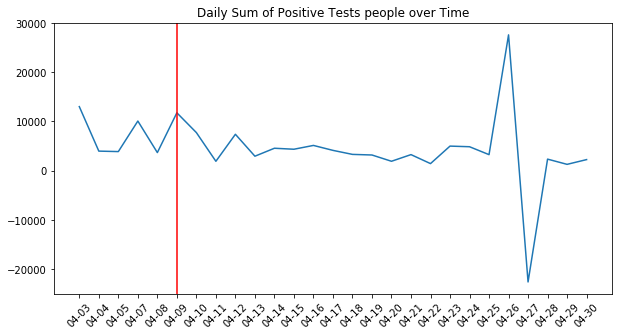

In [23]:
#Note we do not include the first date (4/1) in these plots as we only have the
#cumulative values for that date

#Take the deltas to get the incident cases
cumdeltas = daily_sum.Positive.diff()
plt.figure(figsize = (10,5))
plt.plot(date_list[1:], cumdeltas[1:])
plt.xticks(rotation=45)
plt.axvline('04-09', color='r')
plt.title("Daily Sum of Positive Tests people over Time")
plt.show();

In [24]:
#We see that the 26th is an outlier - make a dataframe without it
all_merged['Date'] = all_merged['Date'].astype('string')

no_26 = all_merged[all_merged.Date != '04-26']


no_26 = no_26.reset_index(drop=True)

daily_sum_no26 = no_26.groupby("Date", as_index = False).sum()

#Know what each unique date is
date_list_no26 = daily_sum_no26["Date"].tolist()
#and make sure its sorted
date_list_no26.sort()

TypeError: data type 'string' not understood

In [ ]:
#Now without the 26th
#Note we do not include the first date (4/1) in these plots as we only have the
#cumulative values for that date

cumdeltas = daily_sum_no26.Positive.diff()
plt.figure(figsize = (10,5))
plt.plot(date_list_no26[2:], cumdeltas[1:])
plt.xticks(rotation=45)
plt.axvline('04-09', color='r')
plt.title("Daily Sum of Positive Tests per 10k people over Time - without 4/26")
plt.show();

## Line graphs on the zip code level

In [ ]:
#Get all zip codes, sorted
arr_of_zipz = np.sort(np.unique(np.array(all_merged["MODZCTA"])))

In [ ]:
#take out last zip - 99999
arr_of_zipz = arr_of_zipz[:-1]

In [ ]:
#There is a repeat of 4-10 for zip code 11697
all_merged[(all_merged['MODZCTA'] == '11697') & (all_merged['Date'] == '04-10')]

In [ ]:
#drop the repeat
all_merged = all_merged.drop(all_merged.index[177])

In [ ]:
all_merged[(all_merged['MODZCTA'] == '11697') & (all_merged['Date'] == '04-10')]

In [ ]:
#make this row the average for Positive and Total:
all_merged.at[176,'Positive']= 57
all_merged.at[176,'Total']= 112

In [27]:
all_merged[(all_merged['MODZCTA'] == '11697') & (all_merged['Date'] == '04-10')]

,Date,MODZCTA,Positive,Total,zcta_cum.perc_pos,median_house_income,housing_units,pop_total,med_age,pop_perc_white,...,perc_transportation_warehousing,perc_utilites,perc_information,perc_finance,perc_scientific,perc_education_healthcare,perc_arts_entertainment,perc_otherservices,perc_publicadministration,test_per_10k
176,04-10,11697,57.0,112.0,51.26,93333.0,2411.0,4006.0,44.7,0.989016,...,0.15748,0.055118,0.047244,0.102362,0.031496,0.19685,0.0,0.047244,0.03937,152.271593


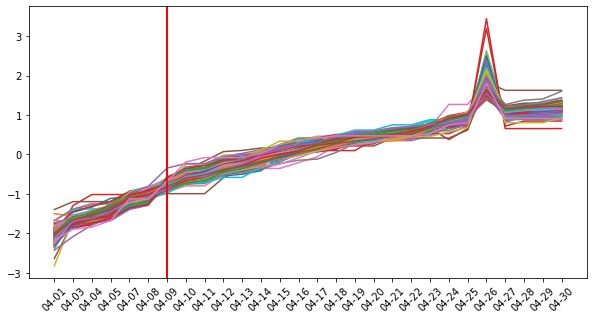

In [28]:
#All zip codes, tests per 10k people over time - standardized cumulative values

plt.figure(figsize = (10,5))
for i in arr_of_zipz:
    subset = all_merged[all_merged['MODZCTA'] == i].sort_values(['Date'])
    subset['test_per_10k'] = (subset['test_per_10k'] - subset['test_per_10k'].mean(axis = 0))/subset['test_per_10k'].std(axis = 0)
    plt.plot(date_list, subset['test_per_10k'])
    plt.axvline('04-09', c='red')
    plt.xticks(rotation=45)
    
plt.show()

In [29]:
no_26 = all_merged[all_merged.Date != '04-26']
no_26 = no_26.reset_index(drop=True)
no_26_date = list(no_26.Date.unique())
no_26_date.sort()

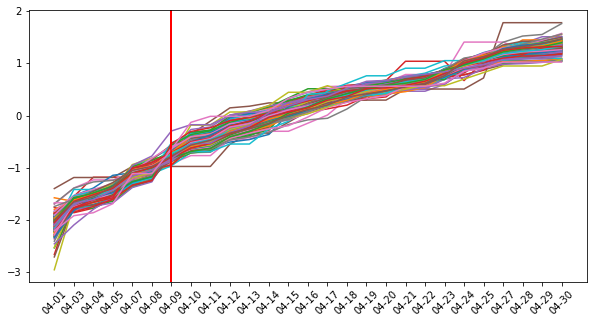

In [30]:
#All zip codes, tests per 10k people over time - cumulative values - taking out April 26th

plt.figure(figsize = (10,5))
for i in arr_of_zipz:
    subset = no_26[no_26['MODZCTA'] == i].sort_values(['Date'])
    subset['test_per_10k'] = (subset['test_per_10k'] - subset['test_per_10k'].mean(axis = 0))/subset['test_per_10k'].std(axis = 0)
    plt.plot(no_26_date, subset['test_per_10k'])
    plt.axvline('04-09', c='red')
    plt.xticks(rotation=45)
    
plt.show()

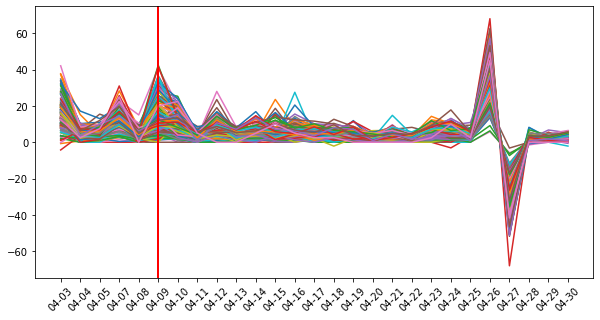

In [31]:
#Deltas (so, discrete incident cases) over time for each zip code, not standardized
plt.figure(figsize = (10,5))
for i in arr_of_zipz:
    subset = all_merged[all_merged['MODZCTA'] == i].sort_values(['Date'])
    deltas = subset.test_per_10k.diff()
    plt.plot(date_list[1:], deltas[1:])
    plt.axvline('04-09', c='red')
    plt.xticks(rotation=45)
    
plt.show()

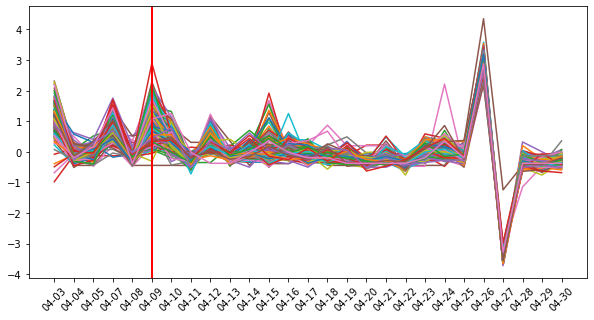

In [32]:
#Deltas (so, discrete incident cases) over time for each zip code, standardized

plt.figure(figsize = (10,5))
for i in arr_of_zipz:
    subset = all_merged[all_merged['MODZCTA'] == i].sort_values(['Date'])
    deltas = subset.test_per_10k.diff()
    deltas = (deltas- deltas.mean(axis = 0))/deltas.std(axis = 0)
    plt.plot(date_list[1:], deltas[1:])
    plt.axvline('04-09', c='red')
    plt.xticks(rotation=45)
    
plt.show()

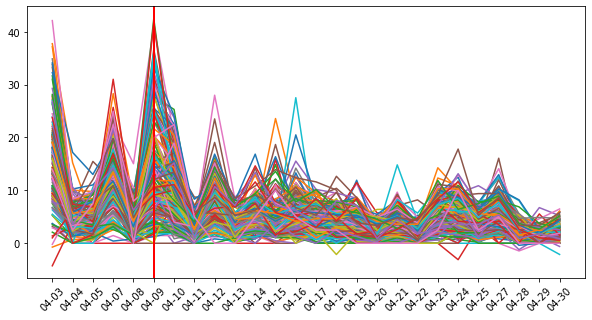

In [33]:
#Deltas (so, discrete incident cases) over time for each zip code, not standardized, no 4/26

plt.figure(figsize = (10,5))
for i in arr_of_zipz:
    subset = no_26[no_26['MODZCTA'] == i].sort_values(['Date'])
    deltas = subset.test_per_10k.diff()
    plt.plot(no_26_date[1:], deltas[1:])
    plt.axvline('04-09', c='red')
    plt.xticks(rotation=45)
    
plt.show()

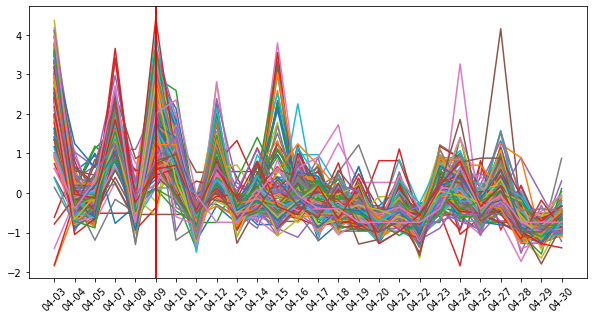

In [34]:
#Deltas (so, discrete incident cases) over time for each zip code, standardized, without April 26th

plt.figure(figsize = (10,5))
for i in arr_of_zipz:
    subset = no_26[no_26['MODZCTA'] == i].sort_values(['Date'])
    deltas = subset.test_per_10k.diff()
    deltas = (deltas- deltas.mean(axis = 0))/deltas.std(axis = 0)
    plt.plot(no_26_date[1:], deltas[1:])
    plt.axvline('04-09', c='red')
    plt.xticks(rotation=45)
    
plt.show()